In [1]:
#Final Project Code 
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline

#Dataset info 
#This dataset is part of the UCI Machine Learning Repository, and the 
#original source can be found here. The original database owners are Jock A. Blackard,
#Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and 
#GIS Program at Colorado State University.

#This dataset includes information on tree type, shadow coverage, 
#distance to nearby landmarks (roads etcetera), soil type, and local topography.

#Cartographic variables of 581,012 measurements. \
#The columns include the following dummy variables:
#Wilderness Area (4 dummy variable binary columns, 0 = absence or 1 = presence): 
#Wilderness area designation. Key is:

#Rawah Wilderness Area
#Neota Wilderness Area
#Comanche Peak Wilderness Area
#Cache la Poudre Wilderness Area

# 40 different soil types explained in write up 

#10 Continiuous Variables 
#44 cateogrical variables 


In [2]:
## Get working directory
os.getcwd()

'/Users/Sebastian/Desktop/Final Final Project'

In [30]:
## Change working directory
os.chdir('/Users/Sebastian/Graduate School/DSC 540 Advance Machine Learning/FInal Project')

In [3]:
#Explatory Analysis
# we are going to try and predict cover type variable 
#import the dataset 
df = pd.read_csv('covtype.csv')
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [22]:
df.shape
# we see that we have 58,1012 Rows of data and 55 columns of data 

(581012, 55)

In [7]:
df.isnull()
# We see we dont have any NAN values, no data holes within the dataset 


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.dtypes
#All variables are INT values, Still contians 10 continuous variables, and 44 cateogrical 



Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [28]:
print(df.describe(include = 'all'))
#get desriptive stats on variables 

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [4]:
# Set up column names 

feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

df.columns = feature_names

In [18]:
#lets look at the stats for the continuous variables 
# Extracting all numerical features from data
cont_Features = df.iloc[:, :10]
print(cont_Features.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [5]:
#lets look at the stats for the categprocal variables 
# Extracting all numerical features from data
cat_Features = df.iloc[:,10:-1]
print(cat_Features.describe())
# We see that Wilderness 1 and 3 are the most common occurances within categorical Wildnerness area
# Most common cateogires that trees will fall into would be Wildnerness 1 or 3 


       Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count     581012.000000     581012.000000     581012.000000     581012.000000   
mean           0.448865          0.051434          0.436074          0.063627   
std            0.497379          0.220882          0.495897          0.244087   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            1.000000          0.000000          1.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          Soil_Type1     Soil_Type2     Soil_Type3     Soil_Type4  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.005217       0.012952       0.008301       0.021335   
std         0.072039       0.113066       0.090731       0.1444

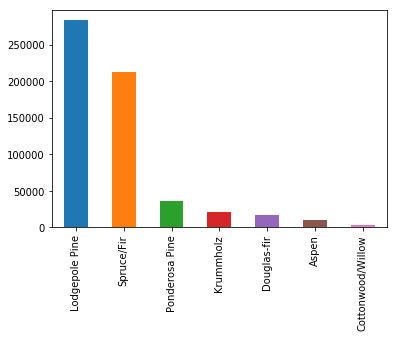

In [42]:
#how many cover types do we have? We are trying to predict, so lets see the distribution
df.groupby("Cover_Type").size()
df['Cover_Type'].value_counts().plot(kind='bar')
#1 = Spruce/Fir #211840
#2 = Lodgepole Pine #283301
#3 = Pondersoa Pine #35754
#4 = Cottonwood /Willow #2747
#5 = Aspen #9493
#6 = Douglas-fir #17367
#7 = Krumholz #20510


#stratifed cross val k Fold
#smode make synethic data for lower classes under repersented
#xg boosting with random forest (tree week learner )


In [35]:
#What is the correlation between the continious variables? 

Correlation = cont_Features
corMatrix = Correlation.corr(method='pearson',min_periods=1)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

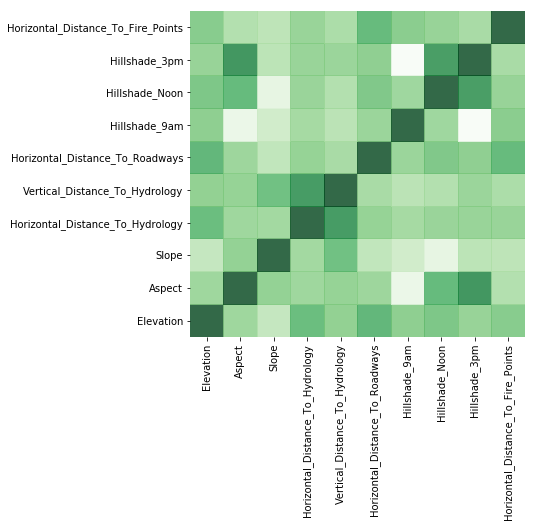

In [50]:
# Set up correlation chart 
fig,axis = plt.subplots()
heatmap = axis.pcolor(corMatrix, cmap=plt.cm.Greens, alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(6, 6)
axis.set_frame_on(False)
axis.set_yticks(np.arange(10) + 0.5, minor=False)
axis.set_xticks(np.arange(10) + 0.5, minor=False)
axis.set_xticklabels(cont_Features[0:10], minor=False)
axis.set_yticklabels(cont_Features[0:10], minor=False)
plt.xticks(rotation=90)
# Quick notes, We see that Hillshade 3PM &Noon is is correlated with Aspect
# We see Hillshade 3pm and noon corrlated with each other 
#Vertical distance and horizontal distance are correlated with each other
#fire points and distance to roads somewhat related

In [104]:
DT = df

In [110]:
def undummy(d):
    return d.dot(d.columns)

DT =DT.assign(WildArea=DT.filter(regex='^Wilderness').pipe(undummy)) #use DT for data explore 

In [202]:
#transform soil types into one column for analysis


DT =DT.assign(Soil=DT.filter(regex='^Soil_Type').pipe(undummy)) #use DT for data explore 



In [203]:
DT.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,WildArea,Soil
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,As,Wilderness_Area1,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,As,Wilderness_Area1,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,LP,Wilderness_Area1,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,LP,Wilderness_Area1,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,As,Wilderness_Area1,Soil_Type29


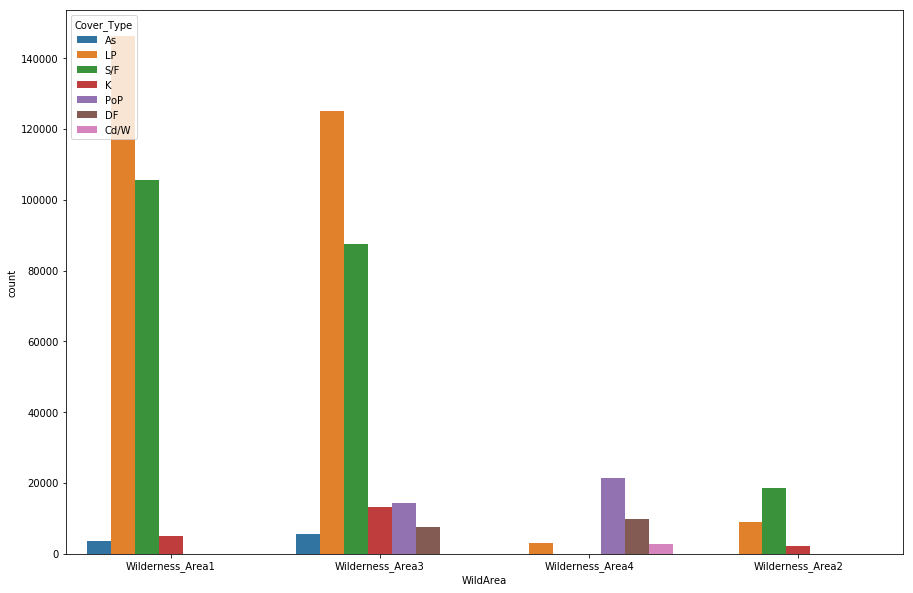

In [136]:
import seaborn as sns
# Lets see how each forest differs in wilderness area 
#Plot for Category1    
plt.figure(figsize=(15,10))
sns.countplot(x="WildArea", hue="Cover_Type", data=DT)

plt.show()



/Users/Sebastian/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


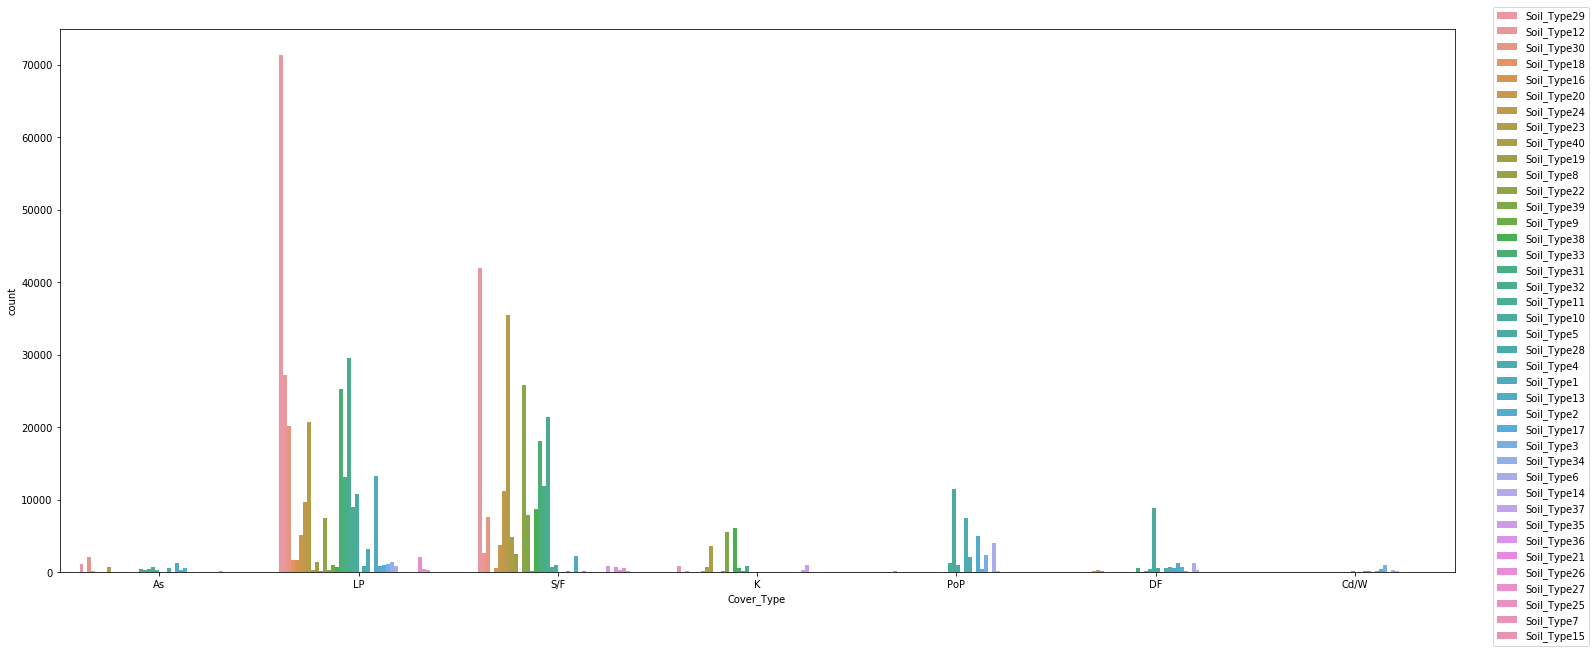

In [215]:
import seaborn as sns
# Lets see how each forest differs in wilderness area 
#Plot for Category1    
plt.figure(figsize=(25,10))

#legend([plot1], "title", prop=fontP)
sns.countplot(x="Cover_Type", hue="Soil", data=DT)
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
# Build ML Model Random Forest 
import sys
import csv
import math
import numpy as np
from operator import itemgetter
import time

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.externals import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale


#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)


In [146]:
#############################################################################
#
# Global parameters
#
#####################

target_idx=54                                       #Index of Target variable
cross_val=1                                         #Control Switch for CV                                                                                      
norm_target=0                                       #Normalize target switch
norm_features=1 #lets try this                                     #Normalize target switch
binning=0                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=0                                        #Start column of features

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs
k_cnt=5                                             #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3

In [149]:
#############################################################################
#
# Load Data
#
#####################

file1= csv.reader(open('covtype.csv'), delimiter=',', quotechar='"')

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
    #print("Length of header is" + str(len(header)))             
    for j in range(feat_start,len(header)-1):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
581012 581012




In [4]:
data_np.shape
#target_np.shape
#arget_np.view()

(581012, 54)

In [46]:
#############################################################################
#
# Preprocess data
#
##########################################
#normaize our continuous variables 

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np[:, :10])
    print("true")

true


In [150]:
#############################################################################
#
# Feature Selection
#
##########################################

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                          #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected:', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    if fs_type ==1:
        ###STEPWISE RECURSIVE 
        clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st)
        sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
        print('Stepwise Recursive Backwards - Random Forest: ')
    
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        #clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)             
        #sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                   
        clf = GradientBoostingClassifier(n_estimators=10,loss='deviance',learning_rate=.1,max_depth=3,min_samples_split=3,random_state=rand_st)
        sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
        
        
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==4:
        clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)
        clf.fit(data_np, target_np) 
        sel_idx = []
        for x in (clf.feature_importances_):
            if x >= np.mean(clf.feature_importances_):
                sel_idx.append(1)
            else:
                sel_idx.append(0)
        

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
               
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index
    

--FEATURE SELECTION ON-- 

Wrapper Select: 
Selected: ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area1']
Features (total/selected): 54 4




In [76]:
#############################################################################
#
# Train SciKit Models
#
##########################################

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)    
    clf.fit(data_train, target_train)

    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    #scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    #print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass            
 
####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}                                                                                                                
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)   
    scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)                                                                                              

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    #scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    #print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
   # print("CV Runtime:", time.time()-start_ts)


--ML Model Output-- 

Random Forest Acc: 0.9523837623859752


In [34]:
#add in bagging 
#by adding in baggnig, was able to reduce run time


# Turn on CV for Random Forest Feature selection wrapper 

#############################################################################
#
# Train SciKit Models
#
##########################################

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)    
    clf.fit(data_train, target_train)

    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    #scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    #print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass            
 
####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy'}                                                                                                                
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)   
    bag = BaggingClassifier(max_samples=.6,random_state=rand_st) 
    bag.fit(data_np,target_np)
    scores = cross_validate(bag, data_np, target_np, scoring=scorers, cv=5) #lets try
    #scores = cross_validate(clf,data_np, target_np, scoring=scorers, cv=5)
    
    #scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5)                                                                                              

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    #scores_AUC= scores['test_roc_auc']                                                                     #Only works with binary classes, not multiclass                  
    #print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
    print("CV Runtime:", time.time()-start_ts)

--ML Model Output-- 

Random Forest Acc: 0.52 (+/- 0.03)
CV Runtime: 57.56299710273743


In [12]:
# Turn on CV for Random Forest Feature selection wrapper 
#Set CV = 10 now 
#dont do normalize 

#############################################################################
#
# Train SciKit Models
#
##########################################

print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
if cross_val==0:    
    #SciKit Random Forest
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)    
    clf.fit(data_train, target_train)

    scores_ACC = clf.score(data_test, target_test)                                                                                                                          
    print('Random Forest Acc:', scores_ACC)
    #scores_AUC = metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1])                                                                                      
    #print('Random Forest AUC:', scores_AUC)                                                                     #AUC only works with binary classes, not multiclass            
 
####Cross-Val Classifiers####
if cross_val==1:
    #Setup Crossval classifier scorers
    scorers = {'Accuracy': 'accuracy','f1_macro':'f1_macro'}    #put in f1 macro score since roc doesnt work                                                                                                              
    
    #SciKit Random Forest - Cross Val
    start_ts=time.time()
    clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st)   
    scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=10)   #lets do CV = 10  
    
    
    
    #no normliazieation

    scores_Acc = scores['test_Accuracy']                                                                                                                                    
    print("Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
    scores_f1= scores['test_f1_macro']                                                                     #Only works with binary classes, not multiclass                  
    print("Random Forest f1: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))                           
    print("CV Runtime:", time.time()-start_ts)

--ML Model Output-- 

Random Forest Acc: 0.60 (+/- 0.13)
Random Forest f1: 0.63 (+/- 0.07)
CV Runtime: 129.16809487342834


In [17]:
fit=clf.fit(data_np,target_np) #fit the random forest 

In [26]:
label.unique()

array([5, 2, 1, 7, 3, 6, 4])

In [58]:
CoverT = {1: 'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'}
#change from integer to class label 
CoverT = {1: 'S/F',2:'LP',3:'PoP',4:'Cd/W',5:'As',6:'DF',7:'K'}
#change from integer to class label 


   # Spruce/Fir
    #Lodgepole Pine
   # Ponderosa Pine
   # Cottonwood/Willow
   # Aspen
   # Douglas-fir
   # Krummholz


In [268]:
df.Cover_Type = [CoverT[item] for item in df.Cover_Type] 
print(df.Cover_Type) 

0          As
1          As
2          LP
3          LP
4          As
5          LP
6          As
7          As
8          As
9          As
10         As
11         LP
12         LP
13         As
14         As
15         As
16         As
17         As
18         As
19         As
20         As
21         LP
22         As
23         As
24         As
25         As
26         As
27         LP
28         LP
29         As
         ... 
580982    PoP
580983    PoP
580984    PoP
580985    PoP
580986    PoP
580987    PoP
580988    PoP
580989    PoP
580990    PoP
580991    PoP
580992    PoP
580993    PoP
580994    PoP
580995    PoP
580996    PoP
580997    PoP
580998    PoP
580999    PoP
581000    PoP
581001    PoP
581002    PoP
581003    PoP
581004    PoP
581005    PoP
581006    PoP
581007    PoP
581008    PoP
581009    PoP
581010    PoP
581011    PoP
Name: Cover_Type, Length: 581012, dtype: object


In [4]:
#base model set up

features = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']]


label = df['Cover_Type']

In [26]:
label = df['Cover_Type']
#Wrapper Features 
#features = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area4']]
#Stepwise Features 
features = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
#Low Variance Filter 
#features = df[['Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']]



In [27]:
from sklearn.model_selection import train_test_split

# split the data in 65 Train 35 test train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.35)

In [152]:
label = df['Cover_Type']
#features = df[['color', 'food', 'score']]

#lets only select features from wrapper select RF 
#features = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area4']]


# features for Gradient Boosting 
features = df[['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area1']]

#features = df.iloc[:,0:54]
#features_train.head()

#clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=None, min_samples_split=3, random_state=rand_st) 


In [28]:
print(X_train.shape, X_test.shape)

(377657, 10) (203355, 10)


In [29]:
print(y_train.shape, y_test.shape)

(377657,) (203355,)


In [30]:
# Random Forest 
start_ts=time.time()
clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=None, min_samples_split=3, random_state=54) 
clf = clf.fit(X_train, y_train) #fit RF model with pre selected features 
print("RF runtime:", time.time()-start_ts)

RF runtime: 9.921865940093994


In [31]:
#cross validate:
start_ts=time.time()
scorers = {'Accuracy': 'accuracy','f1_macro':'f1_macro'}  
scores = cross_validate(clf, X_train, y_train, scoring=scorers, cv=10)   #lets do CV = 10  
    
scores_Acc = scores['test_Accuracy']                                                                                                                                    
print("Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
scores_f1= scores['test_f1_macro']                                                                     #Only works with binary classes, not multiclass                  
print("Random Forest f1: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))                           
print("CV Runtime:", time.time()-start_ts)



Random Forest Acc: 0.93 (+/- 0.00)
Random Forest f1: 0.89 (+/- 0.01)
CV Runtime: 108.36892914772034


In [156]:
#Gradient Boosting 
clf = GradientBoostingClassifier(n_estimators=10,loss='deviance',learning_rate=.1,max_depth=3,min_samples_split=3,random_state=rand_st)
clf = clf.fit(X_train,y_train)

In [22]:
# predicting unseen data
predict = clf.predict(X_test)

In [244]:
predict.view()

array([2, 7, 5, ..., 1, 2, 2])

In [23]:
from sklearn.metrics import accuracy_score, f1_score

# calculating accuracy
accuracy = accuracy_score(y_test, predict)

# calculating f1 score
f1_score = f1_score(y_test, predict, average = 'macro')

In [24]:
# taking precentage and rounding to 3 places
accuracy = np.round(accuracy * 100, 3)
f1_score = np.round(f1_score * 100, 3)

In [25]:
print("The accuracy score of our final model Random Forest Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")

The accuracy score of our final model Random Forest Classifier on our testing set is 93.221 % and f1 score is 86.597 %.


In [192]:
print("The accuracy score of our final model Random Forest Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")

#base model score


The accuracy score of our final model Random Forest Classifier on our testing set is 95.072 % and f1 score is 91.889 %.


In [160]:
print("The accuracy score of our final model Griadnet Boosting Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")

The accuracy score of our final model Griadnet Boosting Classifier on our testing set is 68.603 % and f1 score is 41.103 %.


In [67]:
class_names = df.Cover_Type

In [163]:
predict.view()
from sklearn.utils.multiclass import unique_labels

In [267]:
#CoverT = {1: 'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'}
#change from integer to class label 
CoverT = {1: 'S/F',2:'LP',3:'PoP',4:'Cd/W',5:'As',6:'DF',7:'K'}

In [263]:
DT.Cover_Type = [CoverT[item] for item in DT.Cover_Type] 
print(DT.Cover_Type) 

#predict.shape
#y_test.shape


KeyError: 'As'

In [248]:
from sklearn.metrics import confusion_matrix #confusion matrix of 
import pandas as pd
import numpy as np

labels = np.unique(y_test)
a =  confusion_matrix(y_test, predict, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,1,2,3,4,5,6,7
1,69605,4033,4,0,40,10,121
2,4162,94893,233,4,159,135,28
3,3,280,11798,55,10,317,0
4,0,3,174,733,0,33,0
5,53,805,54,0,2373,10,0
6,10,261,703,44,3,5056,0
7,552,47,0,0,0,0,6551


In [241]:
#how important were the features in predicting the random forest ??

RF_feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, 
                                       columns=['Feature Score']).sort_values('Feature Score', ascending=False)

In [242]:
RF_feature_importances.head(40) #show the feature importanace of all features selected for model build 

,Feature Score
Elevation,0.355030
Horizontal_Distance_To_Roadways,0.130446
Horizontal_Distance_To_Fire_Points,0.113900
Horizontal_Distance_To_Hydrology,0.061202
Vertical_Distance_To_Hydrology,0.057217
Wilderness_Area4,0.054485
Aspect,0.044731
Wilderness_Area1,0.041422
Hillshade_Noon,0.038127
Hillshade_9am,0.036801


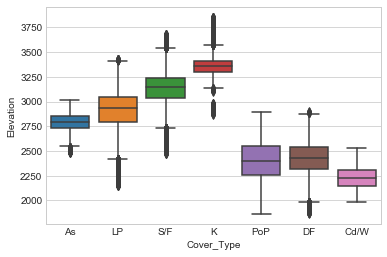

In [269]:
fig,axs=plt.subplots(ncols=1)
sns.boxplot(x='Cover_Type',y='Elevation',data=df,ax=axs)